In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from transformers import AutoTokenizer

# Data

In [2]:
df = pd.read_csv('SPSC.csv')
df['sentence'] = df['sentence'].astype('str')
df['label'] = df['label'].astype('category')
df.head()

,file,sentence,label,position,xmin,xmax,ymin,ymax
0,data/101.tar_1804.04614.gz_CMN_Final_Draft_1.json,(cid:18) (cid:19),equation,0,718,800,52,99
1,data/101.tar_1804.04614.gz_CMN_Final_Draft_1.json,"unknown. If we treat these unknown parameters,...",paragraph,1,80,490,68,98
2,data/101.tar_1804.04614.gz_CMN_Final_Draft_1.json,− y Ax || ||,equation,2,732,857,81,111
3,data/101.tar_1804.04614.gz_CMN_Final_Draft_1.json,to ﬁnd the original sparse signal.,paragraph,3,80,315,97,112
4,data/101.tar_1804.04614.gz_CMN_Final_Draft_1.json,The EM algorithm [13],paragraph,4,324,490,97,112


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458687 entries, 0 to 458686
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   file      458687 non-null  object  
 1   sentence  458687 non-null  object  
 2   label     458687 non-null  category
 3   position  458687 non-null  int64   
 4   xmin      458687 non-null  int64   
 5   xmax      458687 non-null  int64   
 6   ymin      458687 non-null  int64   
 7   ymax      458687 non-null  int64   
dtypes: category(1), int64(5), object(2)
memory usage: 24.9+ MB


# Analysis

## Label

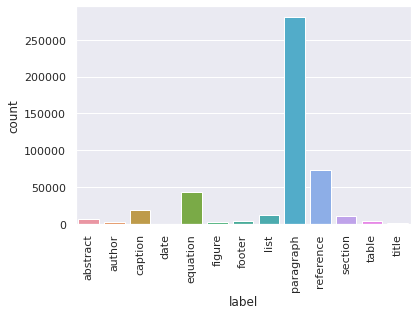

In [4]:
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df, x='label')
ax.tick_params(axis='x', rotation=90)

## Sentence Length

In [5]:
tokenizer = AutoTokenizer.from_pretrained('allenai/scibert_scivocab_uncased')

In [6]:
sentence_lengths = df['sentence'].apply(lambda s: len(tokenizer(s)[0]))
sentence_lengths.rename('sentence_length', inplace=True)

<AxesSubplot:xlabel='sentence_length', ylabel='Count'>

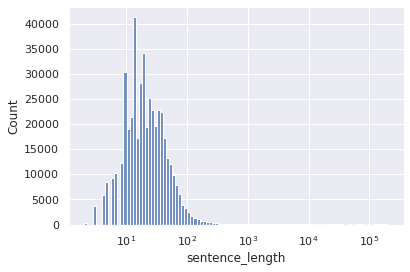

In [7]:
sns.histplot(data=sentence_lengths, bins=100, log_scale=True)

In [8]:
df[sentence_lengths > 128]['label'].value_counts()

paragraph    4170
equation     1273
table         498
figure        169
list          131
reference      40
author         27
caption        19
footer          4
abstract        3
date            0
section         0
title           0
Name: label, dtype: int64

## Paper Length

In [9]:
paper_lengths = df['file'].value_counts()
paper_lengths.rename('paper_length', inplace=True)

data/100.tar_1408.1411.gz_CBPonHHL_15.json                 311
data/103.tar_1507.01070.gz_MDtechRep_1.json                283
data/105.tar_1606.01410.gz_jodon_surface_energy_16.json    273
data/103.tar_1804.05573.gz_pdcro2_9.json                   268
data/105.tar_1507.02253.gz_Full_1.json                     260
                                                          ... 
data/102.tar_1606.00013.gz_ms_1.json                         1
data/104.tar_1408.3549.gz_arXiv_master_6.json                1
data/104.tar_1804.05884.gz_Hecke5_11.json                    1
data/100.tar_1705.04128.gz_manuscript_10.json                1
data/10.tar_1801.04059.gz_ms_12.json                         1
Name: paper_length, Length: 13910, dtype: int64

<AxesSubplot:xlabel='paper_length', ylabel='Count'>

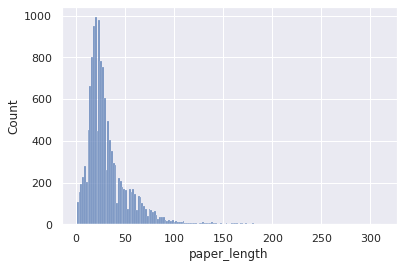

In [10]:
sns.histplot(data=paper_lengths)

## Feature Correlation

<AxesSubplot:>

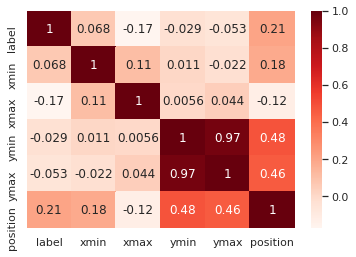

In [11]:
features = df[['label', 'xmin', 'xmax', 'ymin', 'ymax', 'position']].copy()
features['label'] = pd.factorize(features['label'])[0]

sns.heatmap(features.corr(), annot=True, cmap=plt.cm.Reds)